In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        output = self.model(x)
        return output

In [3]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 784),
            nn.Tanh(),
        )
    
    def forward(self, z):
        output = self.model(z)
        output = output.view(output.size(0), 1, 28, 28)
        return output

In [4]:
discriminator = Discriminator()
generator = Generator()

d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

criterion = nn.BCELoss()

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='.', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)


100%|██████████| 9912422/9912422 [00:10<00:00, 922039.10it/s] 


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 29617529.05it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1157356.89it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10421514.64it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [6]:
epochs = 50
for epoch in range(epochs):
    for i, (images, _) in enumerate(train_loader):
        # Train Discriminator
        real_images = images
        real_labels = torch.ones(images.size(0), 1)
        fake_labels = torch.zeros(images.size(0), 1)

        d_optimizer.zero_grad()
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        z = torch.randn(images.size(0), 100)
        fake_images = generator(z)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        d_optimizer.step()

        # Train Generator
        g_optimizer.zero_grad()
        z = torch.randn(images.size(0), 100)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        g_loss.backward()
        g_optimizer.step()
        
    print(f'Epoch [{epoch+1}/{epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, D(x): {real_score.mean().item():.2f}, D(G(z)): {fake_score.mean().item():.2f}')


Epoch [1/50], d_loss: 0.7986, g_loss: 1.1171, D(x): 0.75, D(G(z)): 0.38
Epoch [2/50], d_loss: 0.9384, g_loss: 1.0324, D(x): 0.68, D(G(z)): 0.39
Epoch [3/50], d_loss: 0.8837, g_loss: 1.2215, D(x): 0.66, D(G(z)): 0.35
Epoch [4/50], d_loss: 1.3392, g_loss: 0.8874, D(x): 0.59, D(G(z)): 0.51
Epoch [5/50], d_loss: 1.3501, g_loss: 0.6778, D(x): 0.59, D(G(z)): 0.52
Epoch [6/50], d_loss: 0.9881, g_loss: 1.0616, D(x): 0.62, D(G(z)): 0.38
Epoch [7/50], d_loss: 0.8614, g_loss: 1.2202, D(x): 0.72, D(G(z)): 0.36
Epoch [8/50], d_loss: 0.7138, g_loss: 1.2931, D(x): 0.73, D(G(z)): 0.29
Epoch [9/50], d_loss: 1.0692, g_loss: 1.0748, D(x): 0.62, D(G(z)): 0.40
Epoch [10/50], d_loss: 1.2364, g_loss: 0.9146, D(x): 0.65, D(G(z)): 0.48
Epoch [11/50], d_loss: 0.7895, g_loss: 1.4955, D(x): 0.75, D(G(z)): 0.35
Epoch [12/50], d_loss: 1.0131, g_loss: 0.9992, D(x): 0.65, D(G(z)): 0.39
Epoch [13/50], d_loss: 1.0861, g_loss: 0.9718, D(x): 0.62, D(G(z)): 0.39
Epoch [14/50], d_loss: 0.9850, g_loss: 1.4339, D(x): 0.64, D

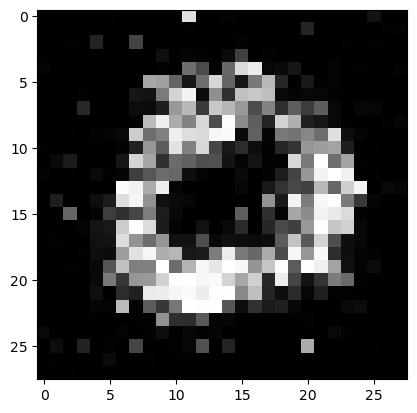

In [11]:
z = torch.randn(1, 100)
fake_image = generator(z).detach()
plt.imshow(fake_image.view(28, 28), cmap='gray')
plt.show()